In [437]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import load_model
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

In [606]:
df = pd.read_csv('training_data.csv')

In [607]:
FM = df.values
dim = np.shape(FM)

In [608]:
x = np.linspace(0,1,n_nodes)

In [609]:
#ignore rotations and moments

F = FM[:,0:int(dim[1]/2)]
F = F[::10,0::2]
F = F/abs(F).max()
D = FM[:,int(dim[1]/2):] 
D = D[::10,0::2]
D = D/abs(D).max()


In [610]:
n_timesteps, n_nodes = np.shape(D)
d = 200 #number of steps in "model memory"
t = d

In [611]:
FL = np.zeros([n_timesteps+d, len(F[0,:])])
FL[d:,:] = F
DL = np.zeros([n_timesteps+d, len(F[0,:])])
DL[d:,:] = D

In [612]:
#Training data



#X_train = np.zeros([n_timesteps-2*d, 2*d*n_nodes+d*n_nodes])
#Y_train = np.zeros([n_timesteps-2*d, d*n_nodes])

X_train = np.zeros([n_timesteps, (d+1)*n_nodes])
Y_train = np.zeros([n_timesteps, n_nodes])


t=d
for i in range(n_timesteps-1):
    
    bulk = 0
    for j in range(n_nodes):
        X_train[i, bulk:bulk + d+1] = FL[t-d:t+1,j]    
        bulk += d+1
    
    #for j in range(n_nodes):
    #    X_train[i, bulk:bulk + d] = D[t-d:t,j]
    #    bulk += d
    
    #for j in range(n_nodes):
     #   X_train[i, bulk: bulk + d] = Dt[t-d:t,j]/rt_max
      #  bulk += d
    #test_bulk = 0
    #for j in range(n_nodes):
    #    Y_train[i, test_bulk:test_bulk+d] = D[t:t+d, j]
    #    test_bulk += d
    
    Y_train[i, :] = DL[t, :]
    t += 1


In [613]:
#X_train_total = X_train

In [614]:
X_train_total = np.concatenate((X_train_total,X_train))

In [ ]:
#X_train = X_train_total

In [615]:
######## BEGIN HERE ########

#Read training data from matlab
df_x = pd.read_csv('x_train.csv')
df_y = pd.read_csv('y_train.csv')

X_train = df_x.values
Y_train = df_y.values

n_timesteps = len(X_train[:,0])

In [616]:
#Neural network architecture
train_portion = 0.8
input_dim = len(X_train[0,:])
output_dim = len(Y_train[0,:])

n_timesteps = len(X_train[:,0])

x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

In [422]:
#Custom loss function

#def total_loss(y_true, y_pred):
    
    
    
    #return total_error

In [617]:
#INITIALIZE NEURAL NETWORK

#Neural network
def baseline_model():
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model



# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
807/807 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 2/100
807/807 [==============================] - 1s 994us/step - loss: 0.0016
Epoch 3/100
807/807 [==============================] - 1s 940us/step - loss: 8.2474e-04
Epoch 4/100
807/807 [==============================] - 1s 1ms/step - loss: 6.5077e-04
Epoch 5/100
807/807 [==============================] - 1s 1ms/step - loss: 5.4783e-04
Epoch 6/100
807/807 [==============================] - 1s 1ms/step - loss: 4.2956e-04
Epoch 7/100
807/807 [==============================] - 1s 984us/step - loss: 5.0266e-04
Epoch 8/100
807/807 [==============================] - 1s 1ms/step - loss: 3.7655e-04
Epoch 9/100
807/807 [==============================] - 1s 1ms/step - loss: 4.5488e-04
Epoch 10/100
807/807 [==============================] - 1s 1ms/step - loss: 3.4178e-04
Epoch 11/100
807/807 [==============================] - 1s 1ms/step - loss: 2.9349e-04
Epoch 12/100
807/807 [==============================] 

807/807 [==============================] - 1s 1ms/step - loss: 1.0988e-04
Epoch 95/100
807/807 [==============================] - 1s 1ms/step - loss: 7.1398e-05
Epoch 96/100
807/807 [==============================] - 1s 1ms/step - loss: 9.3090e-05
Epoch 97/100
807/807 [==============================] - 1s 1ms/step - loss: 1.1195e-04
Epoch 98/100
807/807 [==============================] - 1s 1ms/step - loss: 9.4469e-05
Epoch 99/100
807/807 [==============================] - 1s 1ms/step - loss: 6.7446e-05
Epoch 100/100
807/807 [==============================] - 1s 1ms/step - loss: 5.6134e-05


In [568]:
#### CONTINUE TRAINING ####
model = load_model('beam_model.h5')

model.fit(x_train, y_train, epochs=100, verbose=1)

model.save('beam_model.h5')

#del(model)

Epoch 1/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0790
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0089A: 0s - loss: 0.01
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 12/100
240/240 [==============================] - 0s 1ms/step - loss: 0.

240/240 [==============================] - 0s 968us/step - loss: 0.0034
Epoch 99/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 100/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0023


In [618]:
predictions = model.predict(x_test)

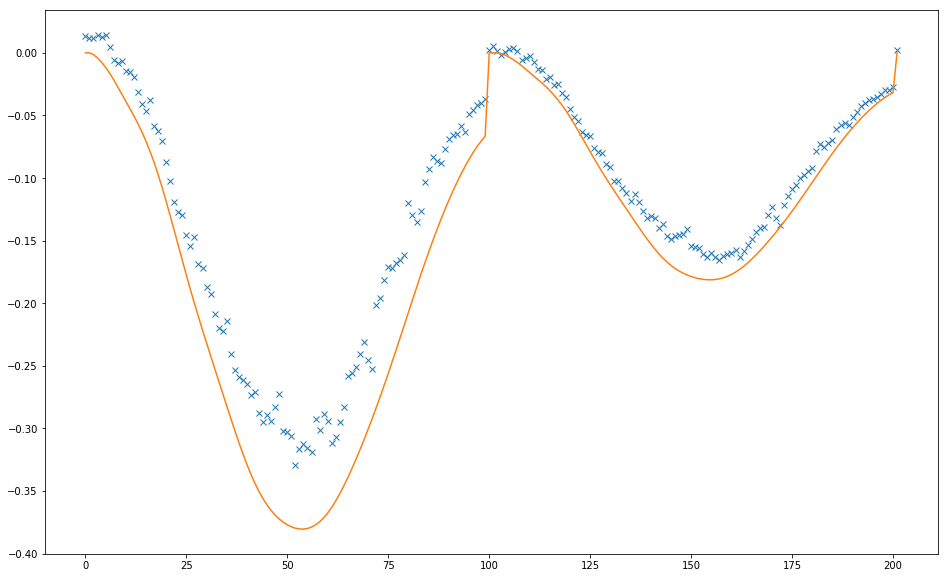

In [619]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:, -1], 'x')
plt.plot(y_test[:, -1])
plt.show()

In [526]:
#Errorfunction
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [527]:
#Error
print(rmse(predictions[:,n_nodes-1], y_test[:,n_nodes-1]))

0.112812835845


In [571]:
#Total error
error = 0
for i in range(len(predictions[:,0])):
    #for j in range(d):
    error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
print(error)

4.26738824007


In [621]:
predictions = model.predict(x_train)

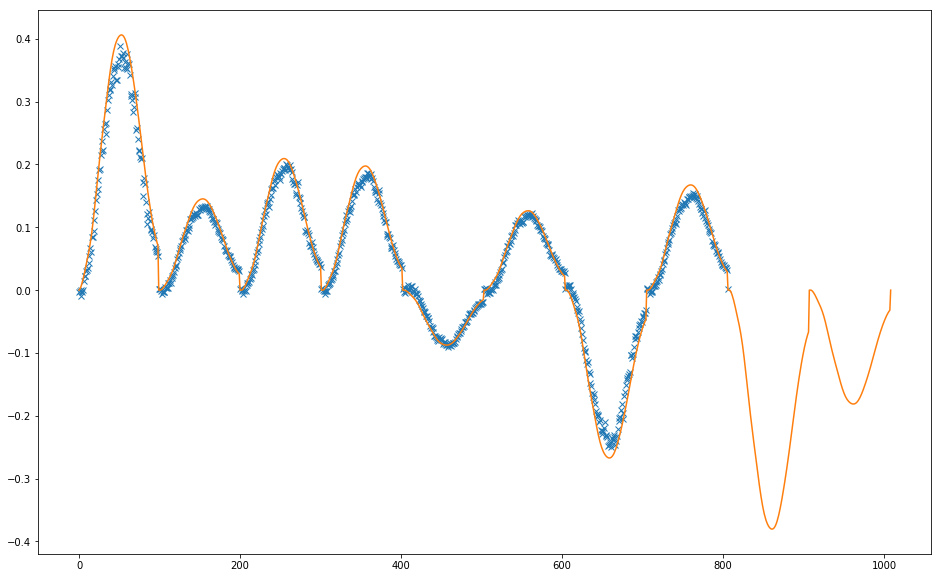

In [622]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,-1], 'x')
plt.plot(Y_train[:, -1])
plt.show()

In [239]:
#independent prediction

input_i = np.copy(x_test[0,:])

#dz = np.copy(input_i[(2*d)*n_nodes:])

#dz = np.reshape(dz, (n_nodes, d))


#dzt = np.copy(input_i[d+1+n_nodes*d:])
#dzt = np.reshape(dzt, (n_nodes, d))

preds = np.zeros([int(len(x_test[:,0])/10), n_nodes*d])
force = np.copy(x_test[:, 0:2*d*n_nodes])

for i in range(int(len(x_test[:,0])/10)):
    
    
    pred = model.predict(np.reshape(input_i,(1,len(input_i))))
    preds[i, :] = pred[0,:]
    
    input_i[0:2*d*n_nodes] = force[i*d+d,:]
    #input_i[(d+1)*n_nodes:] = pred[0,:]
    
    #dz = np.delete(dz, 0, 1)
    #dz = np.concatenate((dz, np.reshape(pred[0,0::d], (1,n_nodes)).T), axis=1)
    #dz[0,:] = np.zeros(d)
    #dzt = np.delete(dzt, 0, 1)
    #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
    #dzt[0,:] = np.zeros(n_nodes)
    #input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
    input_i[2*d*n_nodes:] = pred[0,:]
    #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]
    

    

In [624]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")